# monday

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import pathlib
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir=pathlib.Path(data_dir)

In [3]:
image_count=len(list(data_dir.glob('*/*,jpg')))
print(image_count)

0


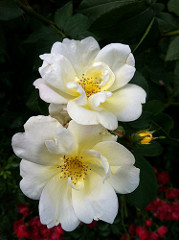

In [4]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

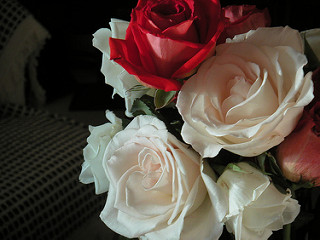

In [5]:
PIL.Image.open(str(roses[1]))

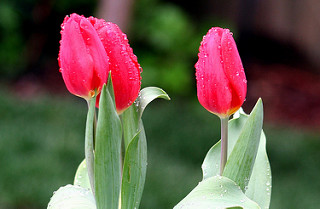

In [6]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

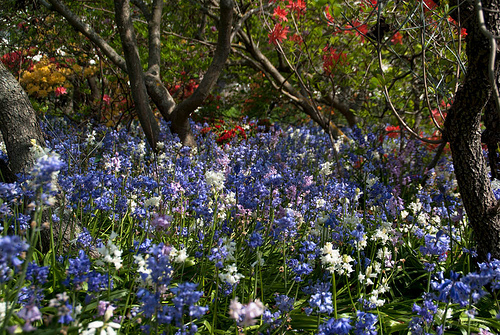

In [7]:
PIL.Image.open(str(tulips[1]))

# Create dataset

In [8]:
batch_size=32
img_height=180
img_width=180

In [9]:
train_ds=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                    validation_split=0.2,
                                                    subset="training",
                                                    seed=123,
                                                    image_size=(img_height,img_width),
                                                     batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                    validation_split=0.2,
                                                    subset="validation",
                                                    seed=123,
                                                    image_size=(img_height,img_width),
                                                     batch_size=batch_size
                             )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Visualize the data

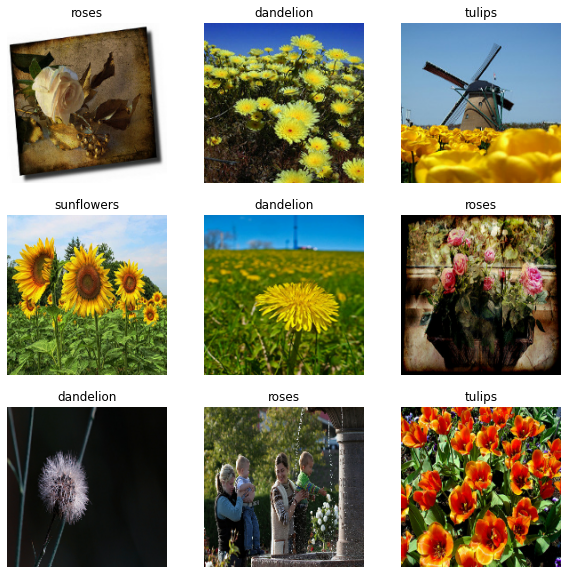

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
for image_batch,labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


# configure the dataset for performance

# standardize the data

In [14]:
normalization_layer=layers.Rescaling(1./255)

In [15]:
normalized_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
#notice the pixel values are now in [0,1]
print(np.min(first_image),np.max(first_image))

0.0 0.96902645


In [16]:
num_classes=len(class_names)

model=Sequential([
        
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)])

In [17]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [18]:
# model summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [20]:
#train the model

In [21]:
epochs=10
history=model.fit(train_ds,
                 validation_data=val_ds,
                 epochs=epochs)

Epoch 1/10
92/92 [==============================] - 112s 1s/step - loss: 1.3744 - accuracy: 0.4326 - val_loss: 1.1027 - val_accuracy: 0.5613
Epoch 2/10
92/92 [==============================] - 135s 1s/step - loss: 0.9983 - accuracy: 0.6042 - val_loss: 1.0586 - val_accuracy: 0.6035
Epoch 3/10
92/92 [==============================] - 116s 1s/step - loss: 0.8476 - accuracy: 0.6713 - val_loss: 1.0010 - val_accuracy: 0.6158
Epoch 4/10
92/92 [==============================] - 115s 1s/step - loss: 0.6548 - accuracy: 0.7633 - val_loss: 1.0864 - val_accuracy: 0.5954
Epoch 5/10
92/92 [==============================] - 130s 1s/step - loss: 0.4543 - accuracy: 0.8369 - val_loss: 1.0162 - val_accuracy: 0.6417
Epoch 6/10
92/92 [==============================] - 111s 1s/step - loss: 0.3004 - accuracy: 0.8978 - val_loss: 1.1810 - val_accuracy: 0.6580
Epoch 7/10
92/92 [==============================] - 110s 1s/step - loss: 0.1986 - accuracy: 0.9407 - val_loss: 1.2955 - val_accuracy: 0.6471
Epoch 8/10
92

# tuesday

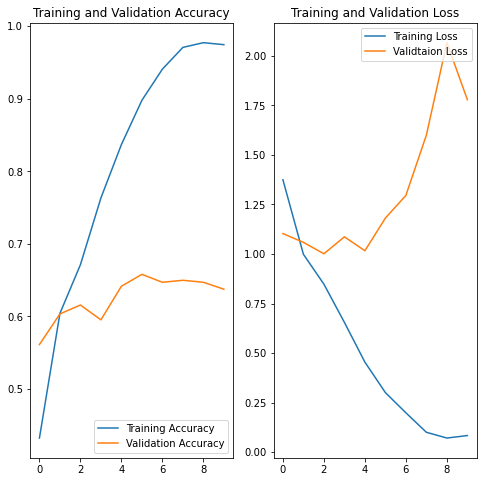

In [22]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validtaion Loss")
plt.legend(loc="upper right")
plt.title('Training and Validation Loss')
plt.show()



In [23]:
data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

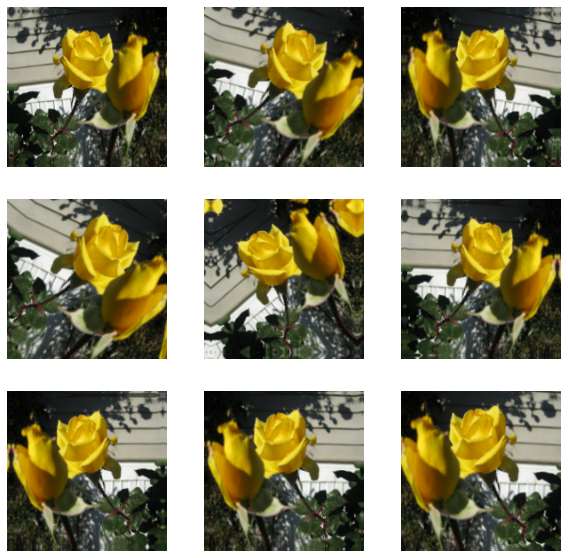

In [24]:
plt.figure(figsize=(10,10))
for images,_ in train_ds.take(1):
    for i in range(9):
        augmented_images=data_augmentation(images)
        ax=plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[8].numpy().astype('uint8'))
        plt.axis("off")

# Dropout

In [27]:
model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [28]:
#compile and train the model

In [29]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [31]:
epochs=15
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 132s 1s/step - loss: 1.3750 - accuracy: 0.4220 - val_loss: 1.1194 - val_accuracy: 0.5300
Epoch 2/15
92/92 [==============================] - 128s 1s/step - loss: 1.0642 - accuracy: 0.5746 - val_loss: 1.1654 - val_accuracy: 0.5245
Epoch 3/15
92/92 [==============================] - 136s 1s/step - loss: 0.9953 - accuracy: 0.6097 - val_loss: 0.9984 - val_accuracy: 0.5981
Epoch 4/15
92/92 [==============================] - 129s 1s/step - loss: 0.9319 - accuracy: 0.6325 - val_loss: 0.9754 - val_accuracy: 0.6172
Epoch 5/15
92/92 [==============================] - 144s 2s/step - loss: 0.8770 - accuracy: 0.6686 - val_loss: 0.9400 - val_accuracy: 0.6485
Epoch 6/15
92/92 [==============================] - 125s 1s/step - loss: 0.8171 - accuracy: 0.6795 - val_loss: 0.8734 - val_accuracy: 0.6717
Epoch 7/15
92/92 [==============================] - 145s 2s/step - loss: 0.7849 - accuracy: 0.7003 - val_loss: 0.8218 - val_accuracy: 0.6907
Epoch 8/15
92

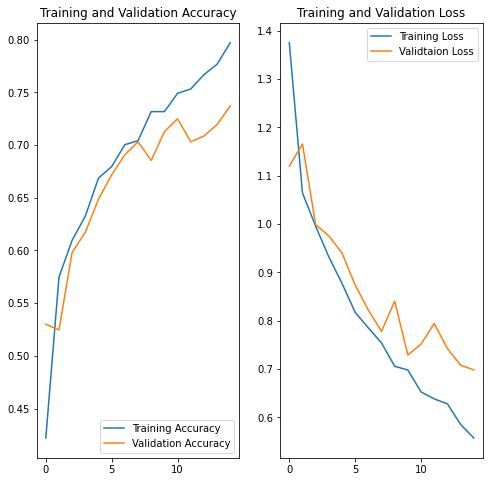

In [32]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validtaion Loss")
plt.legend(loc="upper right")
plt.title('Training and Validation Loss')
plt.show()

In [34]:
sunflower_url="https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path=tf.keras.utils.get_file('Red_sunflower',origin=sunflower_url)
img=tf.keras.utils(sunflower_path,target_size=(img_height,img_width))
img_array=tf.keras.utils.img_to_array(img)
img_array=tf.expand_dims(img_array,0) # create a batch
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])

print("this is image most likely belongs to {} with a {:.2f} percent confidence ".format(class_names[np.argmax(score)],100*np.max(score)))

117948/117948 [==============================] - 4s 38us/step


TypeError: 'module' object is not callable